<a href="https://colab.research.google.com/github/SilvaMercedes/fraude/blob/main/entregable_fraude_tarj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mentoria de Detección de Fraude de Tarjeta de Crédito
Trabajo: Análisis y visualización de datos.
En el siguiente práctico vamos a empezar a trabajar nuestro dataset haciendo uso de algunos conceptos fundamentales y otras 'herramientas' que han ido viendo a lo largo de la primer materia.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(10,6)})

In [2]:
url = 'https://raw.githubusercontent.com/SilvaMercedes/diplo/main/dataset/fraud_data_pt1.csv'
df1_copy = pd.read_csv(url)
url1 = 'https://raw.githubusercontent.com/SilvaMercedes/diplo/main/dataset/fraud_data_pt12.csv'
df2_copy = pd.read_csv(url1)

df = pd.concat([df1_copy, df2_copy], ignore_index=True)
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
#imprimo todas las columnas del DF para decidir cuales selecciono en posterior analisis
df.columns

Index(['Unnamed: 0', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8',
       'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount', 'Class'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,142403.000000,94813.859575,3.922261e-15,5.619317e-16,-8.769470e-15,2.772356e-15,-1.549320e-15,2.019445e-15,-1.693800e-15,-1.988650e-16,...,1.460592e-16,7.960906e-16,5.242038e-16,4.461367e-15,1.438866e-15,1.704215e-15,-3.672395e-16,-1.228006e-16,88.349619,0.001727
std,82216.843396,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,71201.500000,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,142403.000000,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,213604.500000,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,284806.000000,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
# encontrar asimetria de datos
df.skew()

Unnamed: 0     0.000000
Time          -0.035568
V1            -3.280667
V2            -4.624866
V3            -2.240155
V4             0.676292
V5            -2.425901
V6             1.826581
V7             2.553907
V8            -8.521944
V9             0.554680
V10            1.187141
V11            0.356506
V12           -2.278401
V13            0.065233
V14           -1.995176
V15           -0.308423
V16           -1.100966
V17           -3.844914
V18           -0.259880
V19            0.109192
V20           -2.037155
V21            3.592991
V22           -0.213258
V23           -5.875140
V24           -0.552499
V25           -0.415793
V26            0.576693
V27           -1.170209
V28           11.192091
Amount        16.977724
Class         23.997579
dtype: float64

In [6]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [7]:
Time = 'Time'
df[Time].describe().apply(lambda s: '{0:.2f}'.format(s))

count    284807.00
mean      94813.86
std       47488.15
min           0.00
25%       54201.50
50%       84692.00
75%      139320.50
max      172792.00
Name: Time, dtype: object

In [8]:
df[Time].mean(), df[Time].median()

(94813.85957508067, 84692.0)

In [9]:
Amount = 'Amount'
df[Amount].describe().apply(lambda s: '{0:.2f}'.format(s))

count    284807.00
mean         88.35
std         250.12
min           0.00
25%           5.60
50%          22.00
75%          77.16
max       25691.16
Name: Amount, dtype: object

In [10]:
df[Amount].mean(), df[Amount].median()

(88.34961925087359, 22.0)

In [11]:
df[Amount]

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [12]:
df.mean(axis= 0)

Unnamed: 0    1.424030e+05
Time          9.481386e+04
V1            3.922261e-15
V2            5.619317e-16
V3           -8.769470e-15
V4            2.772356e-15
V5           -1.549320e-15
V6            2.019445e-15
V7           -1.693800e-15
V8           -1.988650e-16
V9           -3.135278e-15
V10           1.775882e-15
V11           9.389862e-16
V12          -1.823531e-15
V13           1.687220e-15
V14           1.478796e-15
V15           3.491931e-15
V16           1.390192e-15
V17          -7.352357e-16
V18           4.312891e-16
V19           9.132342e-16
V20           5.114558e-16
V21           1.460592e-16
V22           7.960906e-16
V23           5.242038e-16
V24           4.461367e-15
V25           1.438866e-15
V26           1.704215e-15
V27          -3.672395e-16
V28          -1.228006e-16
Amount        8.834962e+01
Class         1.727486e-03
dtype: float64

In [13]:
df.median(axis=0)

Unnamed: 0    142403.000000
Time           84692.000000
V1                 0.018109
V2                 0.065486
V3                 0.179846
V4                -0.019847
V5                -0.054336
V6                -0.274187
V7                 0.040103
V8                 0.022358
V9                -0.051429
V10               -0.092917
V11               -0.032757
V12                0.140033
V13               -0.013568
V14                0.050601
V15                0.048072
V16                0.066413
V17               -0.065676
V18               -0.003636
V19                0.003735
V20               -0.062481
V21               -0.029450
V22                0.006782
V23               -0.011193
V24                0.040976
V25                0.016594
V26               -0.052139
V27                0.001342
V28                0.011244
Amount            22.000000
Class              0.000000
dtype: float64

La media se puede interpretar como el centro de masa del histograma. 
La media es muy sensible a valores extremos.
La mediana es más robusta a valores extremos.
Si la distribución de los datos es simétrica, las medidas coinciden.

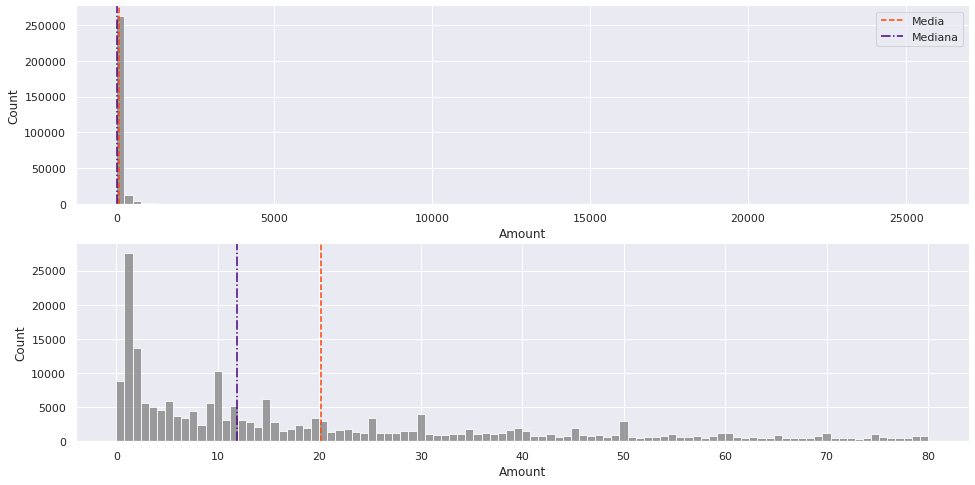

In [14]:
## La diferencia entre media y mediana para Amount
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
sns.histplot(df[Amount], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[Amount].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[Amount].median(), color='indigo',
            linestyle='-.', label='Mediana')
filtered_df = df[df[Amount] < 80]
sns.histplot(filtered_df[Amount], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[Amount].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[Amount].median(), color='indigo',
            linestyle='-.', label='Mediana')


axes[0].legend()
sns.despine()

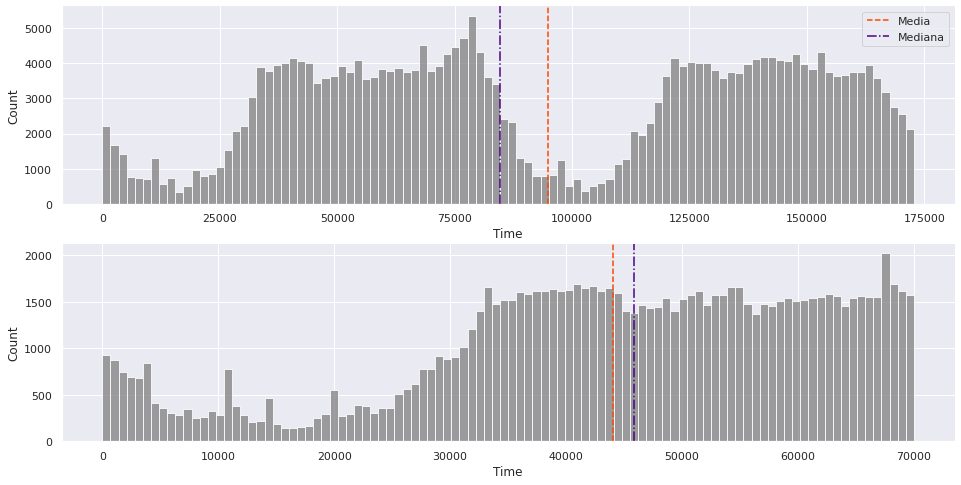

In [15]:
## La diferencia entre media y mediana para Time
fig, axes = plt.subplots(nrows=2, figsize=(16, 8))
sns.histplot(df[Time], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[Time].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[Time].median(), color='indigo',
            linestyle='-.', label='Mediana')
filtered_df = df[df[Time] < 70000]
sns.histplot(filtered_df[Time], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[Time].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[Time].median(), color='indigo',
            linestyle='-.', label='Mediana')


axes[0].legend()
sns.despine()

Explore esto para distintos conjuntos de valores, por ejemplo, dividiendo la variable con bines de valores de intervalos de 20 [20, 40, 80, 100, max_amount], para ver si la distribución es simétrica en alguno de los mismos.

In [16]:
print("\nCantidad de segundos que tiene cada cuartil:")
print("\tQ1:",round(df.describe().transpose()["25%"][0],2),", es decir, el",
      round(df.describe().transpose()["25%"][0]/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("\tQ2:",round(df.describe().transpose()["50%"][0]-df.describe().transpose()["25%"][0],2),
      ", es decir, el",
      round((df.describe().transpose()["50%"][0]-df.describe().transpose()["25%"][0])/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("\tQ3:",round(df.describe().transpose()["75%"][0]-df.describe().transpose()["50%"][0],2),
      ", es decir, el",
      round((df.describe().transpose()["75%"][0]-df.describe().transpose()["50%"][0])/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("\tQ4:",round(df.describe().transpose()["max"][0]-df.describe().transpose()["75%"][0],2),
      ", es decir, el",
      round((df.describe().transpose()["max"][0]-df.describe().transpose()["75%"][0])/df.describe().transpose()["max"][0]*100,2),"% del tiempo." )
print("Lo cual nos indica que las transacciones no se realizaron de manera homogenea en el tiempo sin",
      "necesidad de hacer ningún gráfico.")


Cantidad de segundos que tiene cada cuartil:
	Q1: 71201.5 , es decir, el 25.0 % del tiempo.
	Q2: 71201.5 , es decir, el 25.0 % del tiempo.
	Q3: 71201.5 , es decir, el 25.0 % del tiempo.
	Q4: 71201.5 , es decir, el 25.0 % del tiempo.
Lo cual nos indica que las transacciones no se realizaron de manera homogenea en el tiempo sin necesidad de hacer ningún gráfico.


In [17]:
print("Respecto a la columna Amount, podemos ver algo muy interesante: mientras que su media es de",
     "aproximadamente",round(df.describe().transpose()["mean"][29],2),"el valor de Amount que es mayor al",
     "75% de los casos es", round(df.describe().transpose()["75%"][29],2),". Lo cual nos dice que los valores",
     "más elevados de esta columna hacen que la media no sea representativa del conjunto.")

Respecto a la columna Amount, podemos ver algo muy interesante: mientras que su media es de aproximadamente -0.0 el valor de Amount que es mayor al 75% de los casos es 0.08 . Lo cual nos dice que los valores más elevados de esta columna hacen que la media no sea representativa del conjunto.


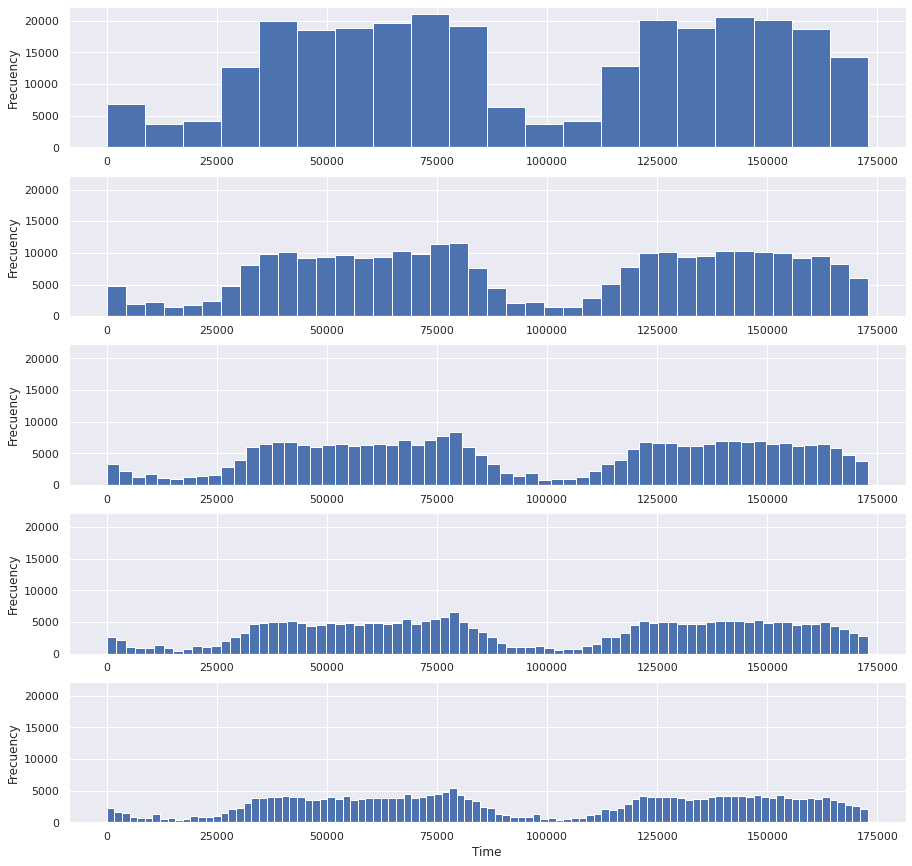

Se puede ver en los histogramas, para todo número de bins probados (20, 40, 50, 80 y 100), que la distribución de las transacciones en el tiempo no es uniforme.


In [18]:
#2.2

# Ploteo de los histogramas de la columna Time con diferente cantidad de bins.
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,sharey=True,figsize=(15,15))
ax1.hist(df.Time,bins=20)
ax1.set(ylabel="Frecuency")
ax2.hist(df.Time,bins=40)
ax2.set(ylabel="Frecuency")
ax3.hist(df.Time,bins=60)
ax3.set(ylabel="Frecuency")
ax4.hist(df.Time,bins=80)
ax4.set(ylabel="Frecuency")
ax5.hist(df.Time,bins=100)
ax5.set(ylabel="Frecuency",xlabel="Time")
plt.show()

print("Se puede ver en los histogramas, para todo número de bins probados (20, 40, 50, 80 y 100),",
      "que la distribución de las transacciones en el tiempo no es uniforme.")

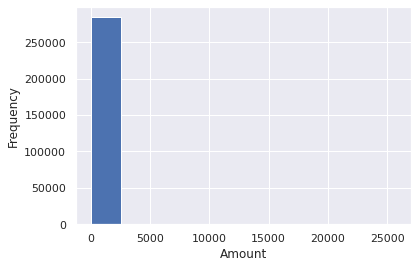

El histograma de la columna Amount es raro, queda desproporcionado por algunos outliers. Vamos a eliminar los valores extremos para que no nos distorcione esta visualización.


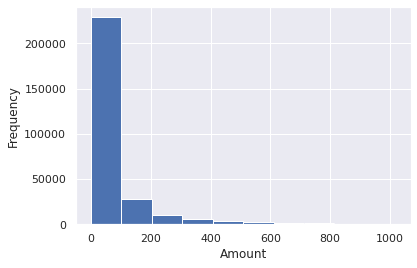

Ahora que está más uniforme variemos la cantidad de bines.


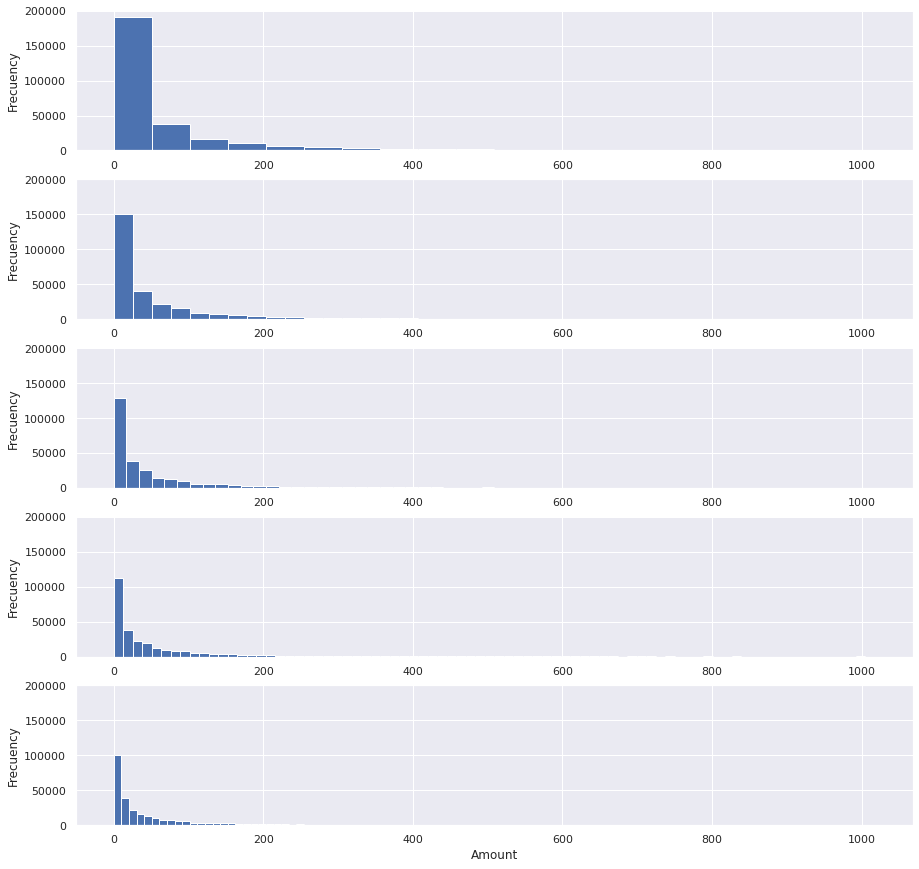

Se puede observar que hay una gran mayoría de las transacciones con transacciones menores a 200.


In [19]:
# Ploteo del histograma de la columna Amount.
plt.hist(df.Amount)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

print("El histograma de la columna Amount es raro, queda desproporcionado por algunos outliers.",
     "Vamos a eliminar los valores extremos para que no nos distorcione esta visualización.")

# Removemos las transacciones pertenecientes al 1% más grande.
df_New = df[df["Amount"] < df["Amount"].quantile(99/100)]

# Ploteo del histograma de la columna Amount sin outliers.
plt.hist(df_New.Amount)
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()

print("Ahora que está más uniforme variemos la cantidad de bines.")

# Ploteo de los histogramas de la columna Time con diferente cantidad de bins.
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5,1,sharey=True,figsize=(15,15))
ax1.hist(df_New.Amount,bins=20)
ax1.set(ylabel="Frecuency")
ax2.hist(df_New.Amount,bins=40)
ax2.set(ylabel="Frecuency")
ax3.hist(df_New.Amount,bins=60)
ax3.set(ylabel="Frecuency")
ax4.hist(df_New.Amount,bins=80)
ax4.set(ylabel="Frecuency")
ax5.hist(df_New.Amount,bins=100)
ax5.set(ylabel="Frecuency",xlabel="Amount")
plt.show()

print("Se puede observar que hay una gran mayoría de las transacciones con transacciones menores a 200.")

Analizando la columna class (el target). ¿Cómo describirían la distribución de la misma? Usen un gráfico para mostrar dicha distribución.

In [20]:
Class = 'Class' 
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Tan solo el 0.2% de los casos es fraudulento. Es un dataset desbalanceado.

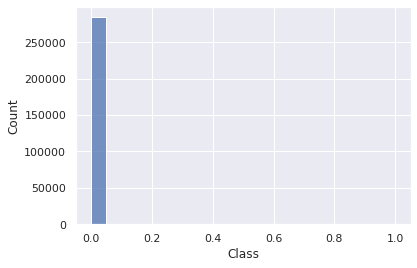

In [21]:
sns.histplot(x='Class', data=df)

In [22]:
is_fraud = df.Class == '1'

groupA = df[is_fraud].Class
groupB = df[~is_fraud].Class

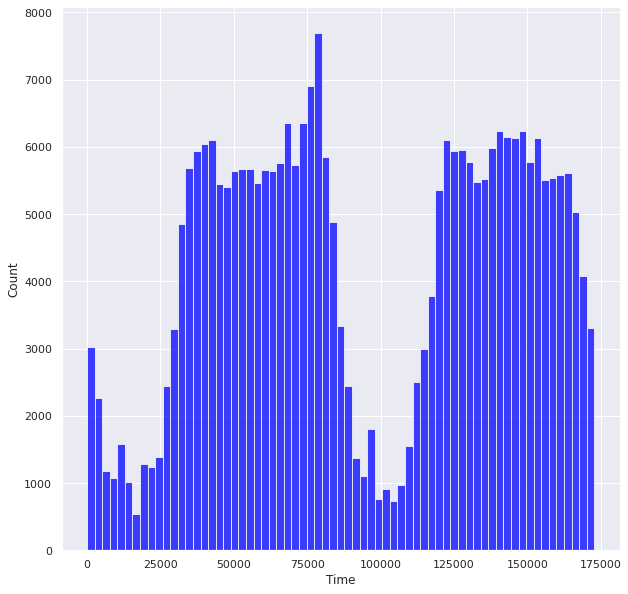

In [23]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='Time', y = groupA, color='blue')      


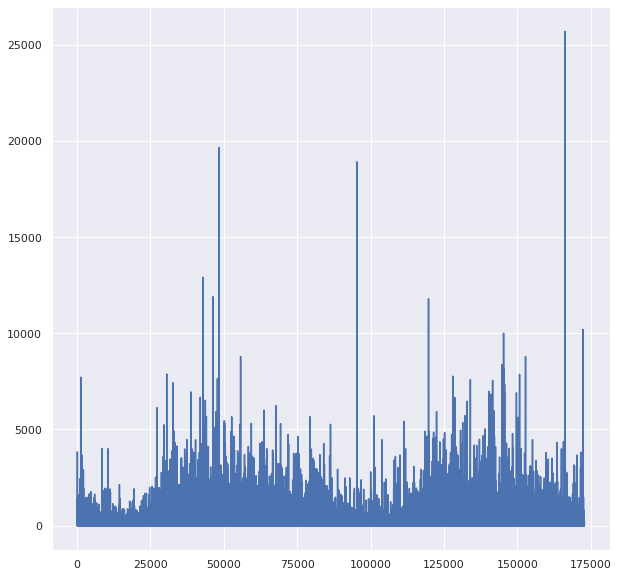

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(df['Time'], df['Amount'])      


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x='Amount', y='Time',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')